# Neural Network
Artificial neural network (ANN) is a machine learning application that uses the concepts of human brain to build computer programs that can learn and perform tasks efficiently. Neural networks have been implemented successfuly for many applications such as text classification, speech recognition, and prediction. 

This post shows the steps to implement a nerual network model with one hidden layer and a sigmoid activation and loss function. Data is split into training, validation, and test sets. The same is then implemented using sklearn's MLPClassifier. Both systems gave similar results. 

## Load Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import csv
from mpl_toolkits import mplot3d
from scipy.special import expit
from classifiers.nn_classifier import NeuralNet

In [67]:
def load_data(filename, rows=10):
    """
    Reads csv file and loads specified columns

    Arguments:
        filename -- full path with filename
        rows -- number of rows to load
    Returns:
        dataframe
    """

    df = pd.read_csv(filename, usecols=["Temperature (C)", "Humidity", "Wind Speed (km/h)"], 
                       na_values=["nan"], nrows=rows)
    return df

def prepare_data(df, x_col, y_col):
    """
    prepare x and y values

    Arguments:
        df -- pandas dataframe
        x_col -- name of x column(s)
        y_col -- name of y column
    Returns:
        x_data -- dataframe for x values
        y_data -- dataframe for y values
    """
    # Dependent variable: humidity
    y_data = df.loc[:, y_col]
    
    # Independent variable: Temperature
    x_data = df.loc[:, x_col]

    # normalize data
    x_data = normalize(x_data)

    # Change y into categories for logistic regression
    # Using 0.7 arbitrarily to divide the variable into two groups humid (1) and non-humid (0)
    y_data = pd.Series(np.where(y_data.values > 0.7, 1, 0))
    
    return x_data, y_data

def plot_data(df, title="Weather Data", xlabel="x values", ylabel="y values"):
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

def normalize(X):
    '''normalize each column of the matrix X'''
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    return (X - X_mean) / X_std



## Step 1: Load data

In [68]:
# load data. The load_data function returns a pandas dataframe object.
df_data = load_data("./data/weatherHistory.csv", rows=100000)
df_data.dropna()

print(df_data.shape)
print(df_data.head())

(96453, 3)
   Temperature (C)  Humidity  Wind Speed (km/h)
0         9.472222      0.89            14.1197
1         9.355556      0.86            14.2646
2         9.377778      0.89             3.9284
3         8.288889      0.83            14.1036
4         8.755556      0.83            11.0446


## Step 2: Prepare data

In [69]:
# prepare x and y data
x, y = prepare_data(df_data, ["Temperature (C)", "Wind Speed (km/h)"], "Humidity")

# change dimensions
y = np.array(y)
y = y.reshape(-1, 1)
print('x.shape:', x.shape)
print('y.shape:', y.shape)

# split data into train, validation, and test sets
X_train, X_val, X_test = np.split(x, [int(.6 * len(x)), int(.8 * len(x))])

y_train, y_val, y_test = np.split(y, [int(.6 * len(y)), int(.8 * len(y))])

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

x.shape: (96453, 2)
y.shape: (96453, 1)
Train data shape:  (57871, 2)
Train labels shape:  (57871, 1)
Validation data shape:  (19291, 2)
Validation labels shape:  (19291, 1)
Test data shape:  (19291, 2)
Test labels shape:  (19291, 1)


## Step 3: Build and train neural network model

In [70]:
from classifiers.nn_classifier import NeuralNet

# 2 nodes in layer1 (input layer), 2 nodes in layer 2, 1 node in layer 3 (output)
# theta: (d, 2) matrix

# number of features
input_size = 2 
# number of nodes in the hidden layer
hidden_size = 2 
# number of clsses in output layer. Since only two categories are there, only one binary class is required.
num_classes = 1
# regularization rate
reg_rate = 0.0001

# set seed to get the same result everytime we run the model
np.random.seed(0) 

# initialize neural network classifier class
nn = NeuralNet(input_size, hidden_size, num_classes, std=1e-1)

# train the model
stats = nn.train(X_train, y_train, X_val, y_val,
            learning_rate=0.00005, learning_rate_decay=1, reg=reg_rate,
            num_iters=1000, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])
print('Training Accuracy: ', stats['train_acc_history'][-1])
print('Validation accuracy: ', stats['val_acc_history'][-1])
print()
print("Weights:")
print('W1\'s shape is (# of features + a bias unit, # of nodes in the hidden layer)')
print('W1 shape:', nn.params['W1'].shape)
print('W2\'s shape is (# of nodes in the hidden layer + a bias unit, # of nodes in the output layer)')
print('W2 shape:', nn.params['W2'].shape)
print(nn.params)

iteration 0 / 1000: loss 0.683995
iteration 100 / 1000: loss 0.520451
iteration 200 / 1000: loss 0.519848
iteration 300 / 1000: loss 0.520042
iteration 400 / 1000: loss 0.520254
iteration 500 / 1000: loss 0.520411
iteration 600 / 1000: loss 0.520514
iteration 700 / 1000: loss 0.520572
iteration 800 / 1000: loss 0.520601
iteration 900 / 1000: loss 0.520617
Final training loss:  0.5206340726338214
Training Accuracy:  0.7951478287916227
Validation accuracy:  0.7938416878337048

Weights:
W1's shape is (# of features + a bias unit, # of nodes in the hidden layer)
W1 shape: (3, 2)
W2's shape is (# of nodes in the hidden layer + a bias unit, # of nodes in the output layer)
W2 shape: (3, 1)
{'W1': array([[-4.71597677e-03, -1.21668044e-03],
       [-3.90957419e+00, -3.68638567e+00],
       [-2.21083915e+00, -9.06306308e-01]]), 'W2': array([[-0.21446755],
       [ 1.7431176 ],
       [ 0.63936506]])}


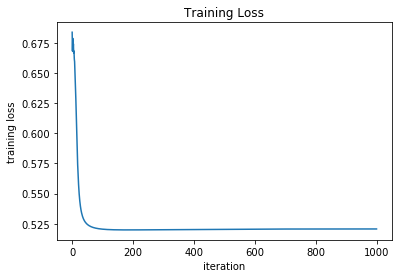

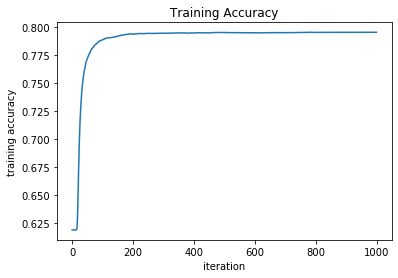

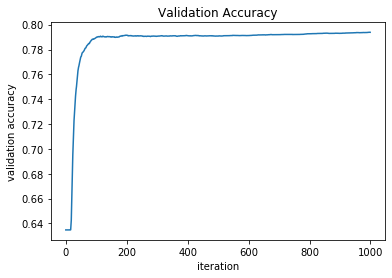

In [71]:
# plot loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss')
plt.show()

# plot accuracy history
plt.plot(stats['train_acc_history'])
plt.xlabel('iteration')
plt.ylabel('training accuracy')
plt.title('Training Accuracy')
plt.show()

# plot validation accuracy history
plt.plot(stats['val_acc_history'])
plt.xlabel('iteration')
plt.ylabel('validation accuracy')
plt.title('Validation Accuracy')
plt.show()


## Step 3: Run the model on test data

In [72]:
# Predict on the test set
test_metrics = nn.test(X_test, y_test, reg=reg_rate)
test_loss = test_metrics['cost']
test_acc = test_metrics['accuracy']
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

Test loss:  0.4985116454326679
Test accuracy:  0.8060235342906018


# Implement neural network model using sklearn

## Prepare data

In [73]:
# prepare x and y data
x, y = prepare_data(df_data, ["Temperature (C)", "Wind Speed (km/h)"], "Humidity")

# change dimensions
y = np.array(y)
y = y.reshape(-1, 1)

# split data into train, and test sets
X_train, X_test = np.split(x, [int(.8 * len(x))])

y_train, y_test = np.split(y, [int(.8 * len(y))])

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (77162, 2)
Train labels shape:  (77162, 1)
Test data shape:  (19291, 2)
Test labels shape:  (19291, 1)


## Fit model on training data

In [74]:
# implement using sklearn MLPClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

y_train = y_train.ravel()
model = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', alpha=0.1, 
                      solver='sgd', batch_size=1000, max_iter=1000, random_state=0)
model.fit(X_train, y_train)

print("Loss: {}".format(model.loss_))
print("Accuracy: {}".format(model.score(X_train, y_train)))
print(model.intercepts_)
print(model.coefs_)

Loss: 0.4599085620011401
Accuracy: 0.7940048210258935
[array([-0.65989561,  0.52557614]), array([0.51413112])]
[array([[ 1.79457837, -1.56390586],
       [ 0.67713621, -0.51746256]]), array([[-2.71187944],
       [ 2.15163951]])]


## Predict on test data

In [75]:
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.7912498056088332

Though the neural network implementation using sklearn's MLPClassifier has some differences compared to our implementation here, the results are very similar. 

On traiing data, we had an accuracy of 0.7951478287916227 compared to sklearn's accuracy of 0.7940048210258935.

On test data, we had an accuracy of 0.8060235342906018 compared to sklearn's accuracy of 0.7912498056088332.